In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load data
crime = pd.read_csv("crime.csv")
crime

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,2015,308613,8224,2664.8,1005,325.7,7219,2339.2,111,36.0
1,Albany,2014,308166,9157,2971.5,995,322.9,8162,2648.6,146,47.4
2,Albany,2013,306300,9455,3086.8,1002,327.1,8453,2759.7,150,49.0
3,Albany,2012,305204,9971,3267.0,1012,331.6,8959,2935.4,137,44.9
4,Albany,2011,305571,10725,3509.8,1163,380.6,9562,3129.2,196,64.1
5,Albany,2010,295267,11036,3737.6,1182,400.3,9854,3337.3,154,52.2
6,Albany,2009,298400,10613,3556.6,1289,432.0,9324,3124.7,191,64.0
7,Albany,2008,299789,10750,3585.9,1356,452.3,9394,3133.5,238,79.4
8,Albany,2007,297154,10584,3561.8,1468,494.0,9116,3067.8,208,70.0
9,Albany,2006,298210,11935,4002.2,1545,518.1,10390,3484.1,200,67.1


First, let's see what the data look like.

In [28]:
def plot_crime(df):
    fig, ax = plt.subplots()
    labels = []
    for key, grp in df.groupby(['County']):
        grp = grp.sort_values(by = ["Year"])
        grp.plot(ax=ax, kind='line', x='Year', y='Index Rate')
        labels.append(key)
    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.5, 2))
    plt.show()

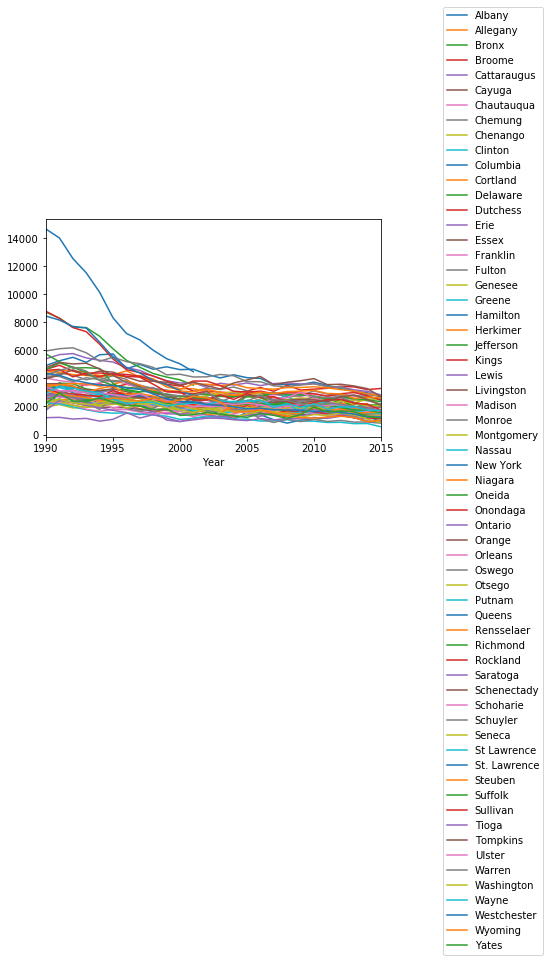

In [29]:
plot_crime(crime)

Looks like some counties didn't report their data every year - especially, the large ones.

In [43]:
counties = set(crime["County"])
nonreporting_counties = set(crime[crime["Index Count"] > 1e5]["County"])
print(nonreporting_counties)

set()

Let's check that assumption. Which counties didn't report their data all years

In [33]:
reporting_counties = []
nonreporting_counties = []

for county in counties:
    if len(crime[crime["County"]==county]["County"]) == 26:
        reporting_counties.append(county)
    else:
        nonreporting_counties.append(county)
print(nonreporting_counties)

['St Lawrence', 'New York', 'St. Lawrence', 'Queens', 'Bronx', 'Kings', 'Richmond']


Let's delete data from the counties that didn't always report it.

In [42]:
for i,county in enumerate(nonreporting_counties):
    crime = crime[crime.County != county]

crime

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,2015,308613,8224,2664.8,1005,325.7,7219,2339.2,111,36.0
1,Albany,2014,308166,9157,2971.5,995,322.9,8162,2648.6,146,47.4
2,Albany,2013,306300,9455,3086.8,1002,327.1,8453,2759.7,150,49.0
3,Albany,2012,305204,9971,3267.0,1012,331.6,8959,2935.4,137,44.9
4,Albany,2011,305571,10725,3509.8,1163,380.6,9562,3129.2,196,64.1
5,Albany,2010,295267,11036,3737.6,1182,400.3,9854,3337.3,154,52.2
6,Albany,2009,298400,10613,3556.6,1289,432.0,9324,3124.7,191,64.0
7,Albany,2008,299789,10750,3585.9,1356,452.3,9394,3133.5,238,79.4
8,Albany,2007,297154,10584,3561.8,1468,494.0,9116,3067.8,208,70.0
9,Albany,2006,298210,11935,4002.2,1545,518.1,10390,3484.1,200,67.1


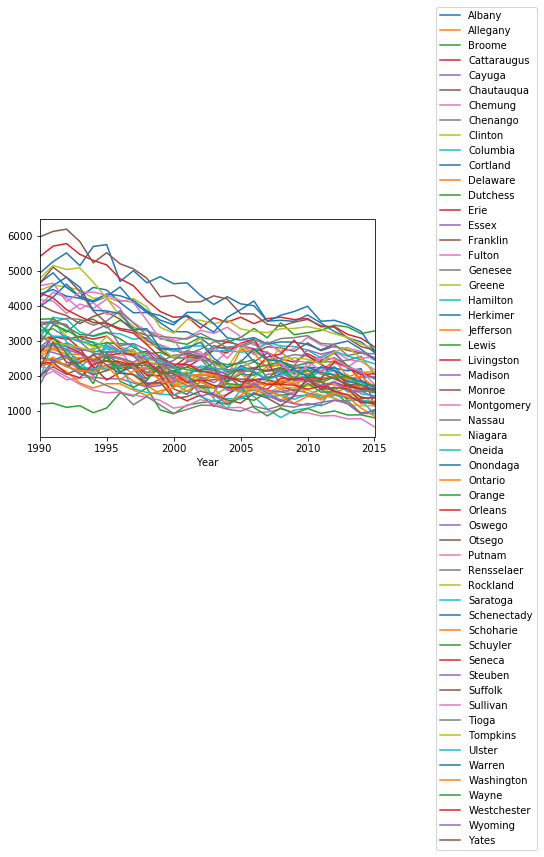

In [38]:
plot_crime(crime)

In [41]:
# just Tompkins county
tompkins = crime[crime["County"]=="Tompkins"]
tompkins

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
1334,Tompkins,2015,105240,2206,2096.2,140,133.0,2066,1963.1,11,10.5
1335,Tompkins,2014,104271,2603,2496.4,103,98.8,2500,2397.6,11,10.5
1336,Tompkins,2013,102977,2902,2818.1,109,105.8,2793,2712.3,16,15.5
1337,Tompkins,2012,102272,2746,2685.0,116,113.4,2630,2571.6,14,13.7
1338,Tompkins,2011,102020,2388,2340.7,90,88.2,2298,2252.5,9,8.8
1339,Tompkins,2010,101158,2505,2476.3,120,118.6,2385,2357.7,14,13.8
1340,Tompkins,2009,101616,2558,2517.3,153,150.6,2405,2366.8,13,12.8
1341,Tompkins,2008,101591,2475,2436.2,137,134.9,2338,2301.4,20,19.7
1342,Tompkins,2007,100687,2452,2435.3,116,115.2,2336,2320.1,8,7.9
1343,Tompkins,2006,100286,2720,2712.2,147,146.6,2573,2565.7,10,10.0


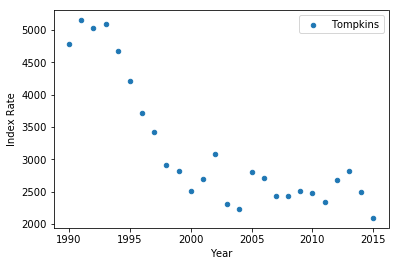

In [49]:
plt.figure()
tompkins.plot.scatter("Year","Index Rate",label="Tompkins")
plt.show()